# Taller 7 - Aceleracion de la gravedad
Nicolas Aguilera Garcia 2127303

los datos estan dados por la ecuacion del perido de un pendulo:

$$ T = 2 \pi \sqrt{\dfrac{l}{g}} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.interpolate import lagrange as lgr
import math




In [ ]:
# Lectura del documento
fileLoad = np.loadtxt("datos.dat")

# fileLoad[0,0]     --- Elemento de fila 0 columna 0
# fileLoad[0:4, 0]  --- Elementos desde fila 0 hasata fila 4 y columna 0

# Recuperar todos los elemetos de cada columna
x = fileLoad[:, 0] # columna 1
y = fileLoad[:, 1] # columna 2

print(fileLoad)

[[ 1.          3.06287292]
 [ 2.          1.56022524]
 [ 3.          1.07753377]
 [ 4.          0.84195004]
 [ 5.          0.62019658]
 [ 6.          0.56183159]
 [ 7.          0.46195029]
 [ 8.          0.45764991]
 [ 9.          0.38240641]
 [10.          0.37635267]]


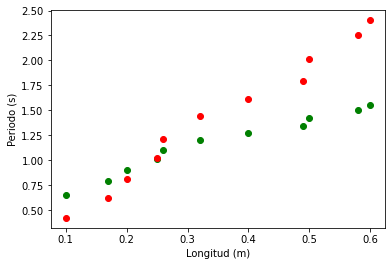

In [ ]:
# Datos originales
longitud  = np.array([0.1,0.17,0.2,0.25,0.26,0.32,0.4,0.49,0.5,0.58,0.6])
periodo   = np.array([0.65,0.79,0.9,1.01,1.10,1.20,1.27,1.34,1.42,1.50,1.55])

# Cambio de variable, elevando toda la ecuacion cuadrado
u = periodo ** 2

plt.plot(longitud, periodo, "og")  # datos originales
plt.plot(longitud, u, "or")        # datos linealizados
plt.xlabel("Longitud (m)")
plt.ylabel("Periodo (s)")
plt.show()

Ecuacion resultante

$$ T^2 = \dfrac{4 \pi^2}{g} l$$
$$ U = \dfrac{4 \pi^2}{g} l$$

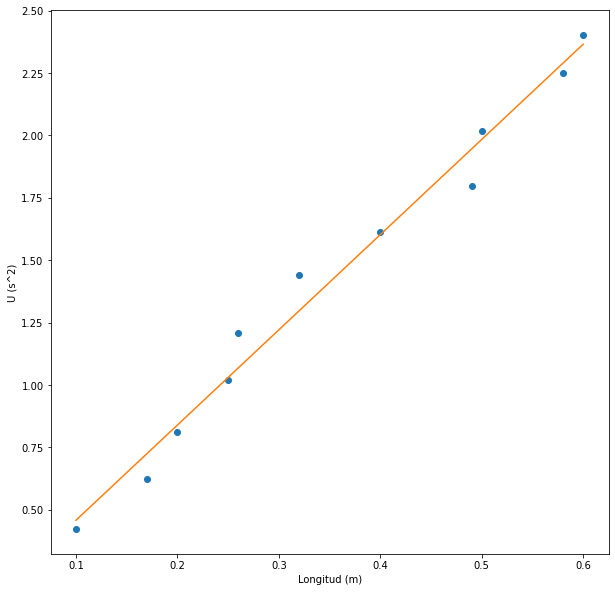

In [ ]:
# Se determina mediante minimos cuadrados una aproximacion a las constantes
# del modelo linealizado
res = sts.linregress(longitud, u)

# Genera datos de prueba para verificar graficamente la relacion entre los valores
# resultantes de minimos cuadrados y los valoreles del modelo lineal
nx = np.linspace(np.min(longitud), np.max(longitud), 2)
ny = res.slope * nx + res.intercept

# Grafica los datos
plt.plot(longitud, u, "o")
plt.plot(nx, ny)
plt.xlabel("Longitud (m)")
plt.ylabel("U (s^2)")
plt.show()

A partir de la ecuacion linealizada se despeja la gravedad en funcion de las demas variables.

$$ U = \dfrac{4 \pi^2}{g} l$$
$$ g = \dfrac{4 \pi^2}{U}  l$$

Calculo de la gravedad a partir de la pendiente encontrada por la regrsion lineal.

$$ U = m l$$
$$ m = \dfrac{4 \pi^2}{g}$$
$$ g = \dfrac{4 \pi^2}{m}$$

In [ ]:
# Determinar constante de la gravedad utilizando la ecuacion linealizada
g_list = ((4 * math.pi ** 2) * longitud) / u
gravedad_l = np.average(g_list)

print(f"La gravedad mediante la ecuacion linealizada es: {gravedad_l}m/s^2")

# Determinar la gravedad a partir de la pendiente encontrada en la regresion
gravedad_r = (4 * math.pi ** 2) / res.slope

print(f"La gravedad mediante la regresion es: {gravedad_r}m/s^2")


# Periodo para un pendulo de 2500mm -> 2.5m, para este caso es utiliza la ecuacion orginal para el
# perido utilizando la gravedad encontrada por el modelo linealizado
peridodo_25m = 2 * math.pi * math.sqrt(2.5 / gravedad_r)

print(f"El perido para cuando la longitud es de 20m es de: {peridodo_25m}s")


La gravedad mediante la ecuacion linealizada es: 9.742335204671654m/s^2
La gravedad mediante la regresion es: 10.347818850611025m/s^2
El perido para cuando la longitud es de 20m es de: 3.088342542947056s


In [ ]:
# Grafica para comparar 

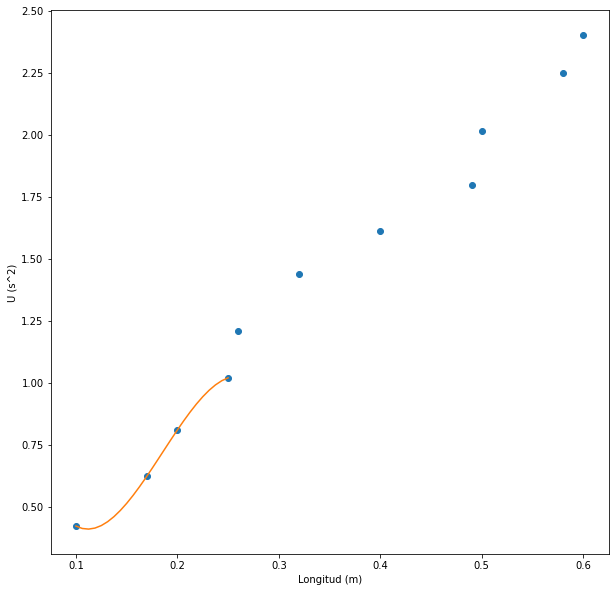

In [ ]:
# Interpolacion de lagrange
# Se calcula utlizando scipy el polinomio de lagrange para los cuatro primeros pares de puntos
# del modelo ya linealizado
pLagrange = lgr(longitud[:4], u[:4])

# Valore resultantes del polinomio de lagrange
nlx = np.linspace(np.min(longitud[:4]), np.max(longitud[:4]), 25)
nly = pLagrange(nlx)

# Grafica los datos
plt.plot(longitud, u, "o")
plt.plot(nlx, nly)
plt.xlabel("Longitud (m)")
plt.ylabel("U (s^2)")
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [ ]:
# Calculo del perido para una longitud de 50cm -> 0.5m

# Con la ecuacion linealizada
periodo_50cm_lineal = 2 * math.pi * math.sqrt(0.5 / gravedad_r)

# Con el polinomio de lagrange
periodo_50cm_lagran = pLagrange(0.5) # En realidad este no es T sino u, no se puede determinar T ya que resulta en raiz de un negativo


print(f"""El periodo para la longitud de 50cm es:
  -> Lagrange: {periodo_50cm_lagran}s
  -> Lineal: {periodo_50cm_lineal}s
""")

El periodo para la longitud de 50cm es:
  -> Lagrange: -9.385899999999967s
  -> Lineal: 1.3811487727668363s



In [ ]:
# Calculo del perido para una longitud de 300cm -> 30m

# Con la ecuacion linealizada
periodo_300cm_lineal = 2 * math.pi * math.sqrt(30 / gravedad_r)

# Con el polinomio de lagrange
periodo_300cm_lagran = pLagrange(30) # En realidad este no es T sino u, no se puede determinar T ya que resulta en raiz de un negativo


print(f"""El periodo para la longitud de 300cm es:
  -> Lagrange: {periodo_300cm_lagran}s
  -> Lineal: {periodo_300cm_lineal}s
""")

El periodo para la longitud de 300cm es:
  -> Lagrange: -10265313.254733326s
  -> Lineal: 10.698332391121538s



Para este caso donde se realizo la interpolacion de lagrange sobre los cuatro primeros pares de puntos, los resultados de lagrange no son validos para los putos donde la longitud es 50cm y 300cm, mientras que por el contrario la regresion lineal si arroja unos valores consistentes a los datos experimentales.

Para que lagrange tenga exito, se debe evaluar en valores de longitud cercanos a 0.1m y 0.25m.

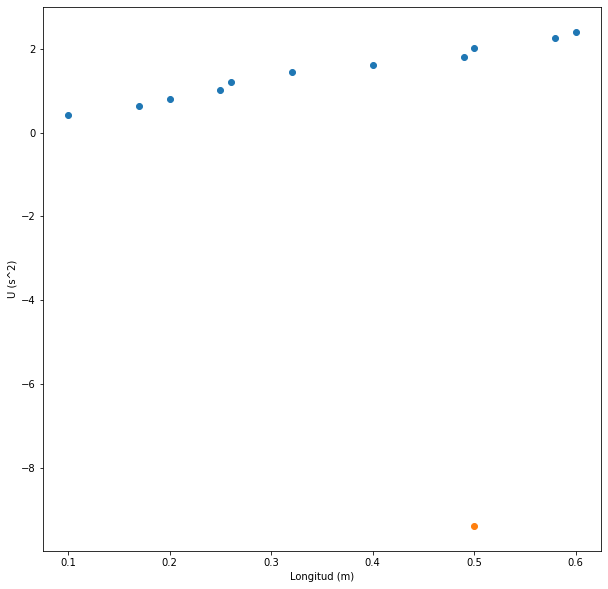

In [ ]:
# No concordancia de lagrnage
plt.plot(longitud, u, "o")
plt.plot([0.5], [periodo_50cm_lagran], "o")
plt.xlabel("Longitud (m)")
plt.ylabel("U (s^2)")
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()